# Lab 5. Fuzzy Systems
# Task 5.1 The Tipping Problem
## Problem Descriptions

Implement a fuzzy system for tipping based on quality of service and the food at a resturant. For memebership function you can use automf() from the skfuzzy package.

Below are the rules for the engine:--

        IF the service was good
        OR the food quality was good
        THEN the tip will be high.

        IF the service was average
        THEN the tip will be medium.

        IF the service was poor
        AND the food quality was poor
        THEN the tip will be low.




## Implementation and Results


#Implementation

To reach the solution first we figure out linguistic variables and their values.
For the above problem statement we have following linguistic variables.

      food(x): poor(A1), average(A2), good(A3)
      service(y): poor(B1), average(B2), good(B3)
      tip(z): low(C1), medium(C2), high(C3)

Here we have two input and one Output.

rules can be visualized as:--

        IF  y was B3
        OR  x was A3
        THEN  z will be C3.

        IF  y was B2
        THEN  z will be C2.

        IF  y was A1
        AND  food quality was B1
        THEN  z will be C1.

to get the membership values we have use automf() function from the skfuzzy package. The graph below shows the distribution of memebership for our linguistic variables.



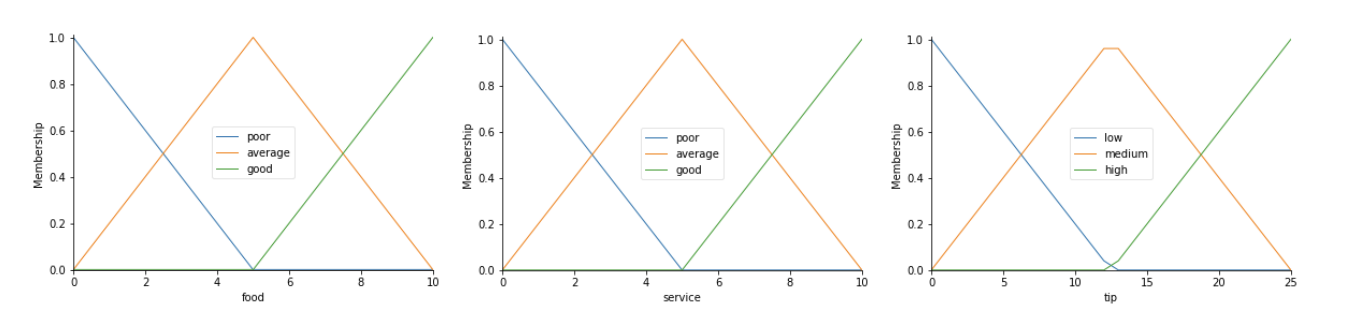

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership functions
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
food.automf(3)
service.automf(3)
tip.automf(3, names=['low', 'medium', 'high'])

food.view()
service.view()
tip.view()

In [ ]:
# Define the rules
rule1 = ctrl.Rule(food['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

# Create the control system and its simulation
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Suggested tip: 19.76409495548962 %


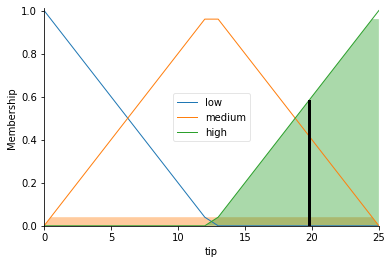

In [ ]:
# Pass inputs to the ControlSystem 
tipping.inputs({'food': 6.5, 'service': 9.8})

# Crunch the numbers
tipping.compute()
print("Suggested tip:", tipping.output['tip'], "%")
tip.view(sim=tipping)


## Discussions

our solution gives the amount of tip based on quality of service and food.
 

*    Input to our engine is two antecedents, quality of service and food.



*   anticedents hold the universe variables 



* we have used,combination of triangular and trapezoidal membership functions for
each linguistic variables

       so, if we pass food:6.5 and service:9.8,
        output which is generated is 19.7.


*   To visualize the solution better, one can also imagine final output as centre of gravity of the coloured graph, which is 19.








